<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
C:\Users\louis\AppData\Local\Temp\ipykernel_24980\1514989117.py:4: SyntaxWarning: invalid escape sequence '\e'
  LOG_DIR = "logs\events.out.tfevents.1745078593.AuraArc.9996.0"


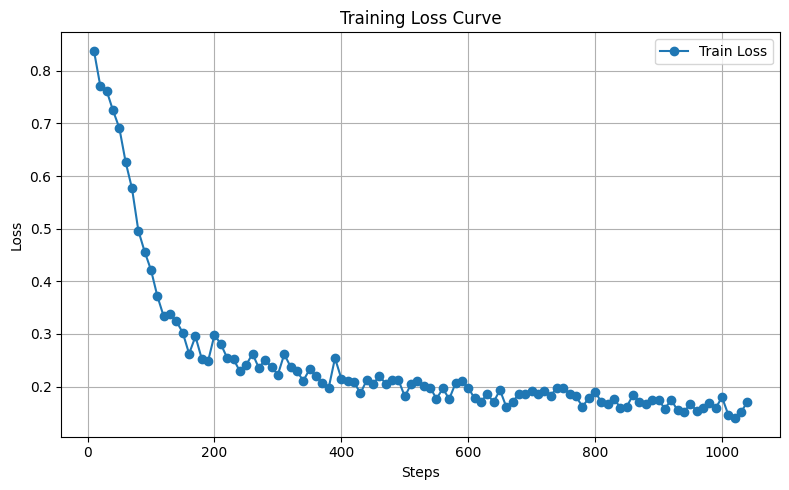

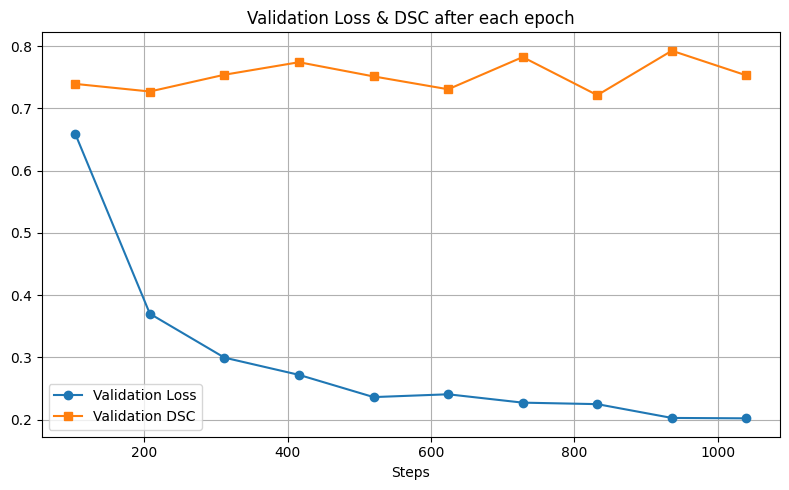

In [6]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt

LOG_DIR = "logs\events.out.tfevents.1745078593.AuraArc.9996.0"

ea = event_accumulator.EventAccumulator(
    LOG_DIR,
    size_guidance={'scalars': 0}  # 0 = load all events
)
ea.Reload()
loss_events     = ea.Scalars('loss')
val_loss_events = ea.Scalars('val_loss')
val_dsc_events  = ea.Scalars('val_dsc')
vall_acc_events  = ea.Scalars('val_accuracy')

train_steps      = [e.step  for e in loss_events]
train_loss = [e.value for e in loss_events]
val_steps  = [e.step  for e in val_loss_events]
val_loss   = [e.value for e in val_loss_events]
val_dsc    = [e.value for e in val_dsc_events]
val_acc   = [e.value for e in vall_acc_events]

plt.figure(figsize=(8,5))
plt.plot(train_steps, train_loss, marker='o', label='Train Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(val_steps, val_loss,   marker='o', label='Validation Loss')
plt.plot(val_steps, val_dsc,    marker='s', label='Validation DSC')
# plt.plot(val_steps, val_acc,    marker='^', label='Validation Accuracy')
plt.xlabel('Steps')
plt.title('Validation Loss & DSC after each epoch')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
